In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8, 4)
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [61]:
df.shape

(28242, 8)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [63]:
df[df.duplicated()]# check duplicated rows

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp


In [64]:
df.drop_duplicates(keep='first', inplace=True) # Drop duplicates.

In [65]:
df.shape

(28242, 8)

In [66]:
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [67]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,28242.0,NaN,NaN,NaN,14120.5,8152.907488,0.0,7060.25,14120.5,21180.75,28241.0
Area,28242,101,India,4048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item,28242,10,Potatoes,4276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,28242.0,NaN,NaN,NaN,2001.544296,7.051905,1990.0,1995.0,2001.0,2008.0,2013.0
hg/ha_yield,28242.0,NaN,NaN,NaN,77053.332094,84956.612897,50.0,19919.25,38295.0,104676.75,501412.0
average_rain_fall_mm_per_year,28242.0,NaN,NaN,NaN,1149.05598,709.81215,51.0,593.0,1083.0,1668.0,3240.0
pesticides_tonnes,28242.0,NaN,NaN,NaN,37076.909344,59958.784665,0.04,1702.0,17529.44,48687.88,367778.0
avg_temp,28242.0,NaN,NaN,NaN,20.542627,6.312051,1.3,16.7025,21.51,26.0,30.65


In [68]:
item = pd.get_dummies(df.Item, dtype=float)

In [69]:
df = pd.concat([df,item], axis=1)

In [70]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [71]:
df.drop(['Unnamed: 0', 'Item', 'Year', 'Area'], axis=1, inplace=True)

In [72]:
df.isnull().sum().sum()

0

In [73]:
df.corr(numeric_only=True)

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
hg/ha_yield,1.000000,0.000962,0.064085,-0.114777,0.241480,-0.198230,0.048354,0.610305,-0.157857,-0.238777,-0.254849,0.166936,-0.219730,0.076761
average_rain_fall_mm_per_year,0.000962,1.000000,0.180984,0.313040,0.130713,-0.029659,0.140728,-0.052759,0.019567,-0.064516,-0.019357,0.039515,-0.107450,0.121164
pesticides_tonnes,0.064085,0.180984,1.000000,0.030946,0.033106,-0.029719,-0.068887,-0.034692,-0.000829,-0.001937,0.022003,0.013354,-0.010770,0.102259
avg_temp,-0.114777,0.313040,0.030946,1.000000,0.162148,-0.040435,0.083091,-0.102716,0.042277,0.048906,-0.050173,0.087513,-0.151914,0.059980
Cassava,0.241480,0.130713,0.033106,0.162148,1.000000,-0.115485,-0.039594,-0.118016,-0.103156,-0.097020,-0.100280,-0.094333,-0.111118,-0.049128
Maize,-0.198230,-0.029659,-0.029719,-0.040435,-0.115485,1.000000,-0.058575,-0.174592,-0.152608,-0.143530,-0.148354,-0.139555,-0.164387,-0.072679
Plantains and others,0.048354,0.140728,-0.068887,0.083091,-0.039594,-0.058575,1.000000,-0.059859,-0.052322,-0.049209,-0.050863,-0.047846,-0.056360,-0.024918
Potatoes,0.610305,-0.052759,-0.034692,-0.102716,-0.118016,-0.174592,-0.059859,1.000000,-0.155953,-0.146676,-0.151606,-0.142615,-0.167990,-0.074272
"Rice, paddy",-0.157857,0.019567,-0.000829,0.042277,-0.103156,-0.152608,-0.052322,-0.155953,1.000000,-0.128207,-0.132516,-0.124657,-0.146838,-0.064920
Sorghum,-0.238777,-0.064516,-0.001937,0.048906,-0.097020,-0.143530,-0.049209,-0.146676,-0.128207,1.000000,-0.124633,-0.117242,-0.138103,-0.061058


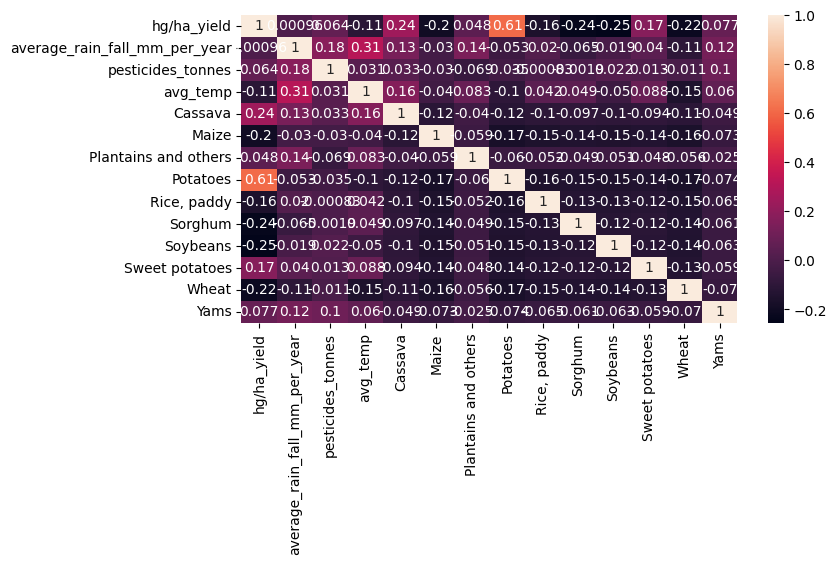

In [74]:
sns.heatmap(df.corr(), annot=True);

In [75]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df,title="yield")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

In [77]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
polynomial_conventer = PolynomialFeatures(degree=2, include_bias=False)
poly_features = polynomial_conventer.fit_transform(X)

In [79]:
poly_features.shape

(28242, 104)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=19)

In [81]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [84]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
ls

,linear_train,linear_test
R2,6.955559e-01,6.979270e-01
mae,2.893971e+04,2.938888e+04
mse,2.153798e+09,2.274077e+09
rmse,4.640903e+04,4.768728e+04


In [85]:
from sklearn.linear_model import RidgeCV
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [86]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv=5, scoring='neg_root_mean_squared_error')

In [88]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [89]:
ridge_cv_model.alpha_

0.54

In [90]:
ridge_cv_model.best_score_

-46496.37611847084

In [91]:
y_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [92]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, 'Ridge_CV')
rcs

,Ridge_CV_train,Ridge_CV_test
R2,6.955547e-01,6.979040e-01
mae,2.893991e+04,2.938888e+04
mse,2.153806e+09,2.274250e+09
rmse,4.640912e+04,4.768910e+04
